In [1]:
from nltk.stem import WordNetLemmatizer 
import nltk
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import PlaintextCorpusReader
import copy
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('sentiwordnet')
nltk.download('wordnet')


wordlists = PlaintextCorpusReader('','twittertweets.txt')
doc=wordlists.raw("twittertweets.txt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [0]:
sentences =doc.split(".")
senlen=len(sentences)-1
stokens = [nltk.word_tokenize(sent) for sent in sentences]  # Tokenization

In [0]:
taggedlist=[]
for stoken in stokens:        
     taggedlist.append(nltk.pos_tag(stoken)) #Part of Speech Tagging (POS) using NLTK POS Tagger
wnl = nltk.WordNetLemmatizer()      # Lemmatization

#print(taggedlist)

In [0]:
score_list_pos=[]
score_list_neg=[]
global_lpn_sum=[]
global_timestamp_sum=[]
global_union=[]
global_intersection=[]
global_union_timestamp_sum=[]
global_intersection_timestamp_sum=[]
selected_tagwords=[]

In [5]:
for idx,taggedsent in enumerate(taggedlist):
    score_list_pos.append([])
    score_list_neg.append([])
    selected_tagwords.append([])
    for idx2,t in enumerate(taggedsent):
        newtag=''
        lemmatized=wnl.lemmatize(t[0])
        if t[1].startswith('NN'):
            newtag='n'
        elif t[1].startswith('JJ'):
            newtag='a'
        elif t[1].startswith('V'):
            newtag='v'
        elif t[1].startswith('R'):
            newtag='r'
        else:
            newtag=''
        #print(t[0],' ',t[1],' ',lemmatized,' ',newtag)
        if(newtag!=''):    
            synsets = list(swn.senti_synsets(lemmatized, newtag))
            print(synsets)
            temp=t[0]
            selected_tagwords[idx].append(temp) # stores the selected words
            
            scorepos=scoreneg=0
            if(len(synsets)>0):
                for syn in synsets:
                    #print(syn)
                    scorepos=syn.pos_score() # Positive score of word  using SentiWordNet lexicon
                    scoreneg=syn.neg_score() # Negative score of word  using SentiWordNet lexicon
                    p=round((scorepos/len(synsets)),4)  
                    n=round((scoreneg/len(synsets)),4)

                score_list_pos[idx].append(p)
                score_list_neg[idx].append(n)


[SentiSynset('make.v.01'), SentiSynset('perform.v.01'), SentiSynset('do.v.03'), SentiSynset('do.v.04'), SentiSynset('cause.v.01'), SentiSynset('practice.v.01'), SentiSynset('suffice.v.01'), SentiSynset('do.v.08'), SentiSynset('act.v.02'), SentiSynset('serve.v.09'), SentiSynset('do.v.11'), SentiSynset('dress.v.16'), SentiSynset('do.v.13')]
[SentiSynset('not.r.01')]
[SentiSynset('necessitate.v.01'), SentiSynset('want.v.02'), SentiSynset('need.v.03')]
[SentiSynset('diss.v.01')]
[SentiSynset('mistreat.v.01'), SentiSynset('pervert.v.03'), SentiSynset('abuse.v.03'), SentiSynset('abuse.v.04')]
[SentiSynset('other.a.01'), SentiSynset('other.s.02'), SentiSynset('early.s.03'), SentiSynset('other.s.04')]
[SentiSynset('show.v.01'), SentiSynset('prove.v.02'), SentiSynset('testify.v.02'), SentiSynset('show.v.04'), SentiSynset('picture.v.02'), SentiSynset('express.v.01'), SentiSynset('indicate.v.02'), SentiSynset('show.v.08'), SentiSynset('read.v.08'), SentiSynset('show.v.10'), SentiSynset('usher.v.0

In [6]:
pos_sum=[]
neg_sum=[]
for j in range(senlen):
    
    print("\n" + str(j+1)+ ": "+ sentences[j])
    words = nltk.word_tokenize(sentences[j])
    tagged = nltk.pos_tag(words)    
#    print("\n "+str(tagged))  # Words and their POS tags

    b=[]
    b.append(selected_tagwords[j])
    stagwords=[]        
    stagwords=copy.copy(b[0])
#    print("\n Selected Tagged tokens are : ")
#    print(stagwords)
    
    list_pos=[]
    list_pos.append(score_list_pos[j])
    lp=[]        
    lp=copy.copy(list_pos[0])
    
    list_neg=[]
    list_neg.append(score_list_neg[j])
    ln=[]        
    ln=copy.copy(list_neg[0])

    print("\n Sentence "+ str(j+1) +" Positive Score for each word in sentence :")
    #print(score_list_pos[j])
    print(lp) 
    
    print("\n Sentence "+ str(j+1) +" Negative Score for each word in sentence :")
    #print(score_list_neg[j])
    print(ln)

    pos_sum.append(sum(list_pos[0]))
    neg_sum.append(sum(list_neg[0]))


# UNION OPEARATION
    union=[]
    print("\n Sentence "+ str(j+1) +" Positive U Negative Score for each word in sentence :")    
    for word in range(len(lp)):
        if lp[word]>ln[word]:
            union.append(lp[word])
        else:
            union.append(ln[word])
    print(union)
    u=round(sum([word_score for word_score in union]),4)
    print(u)
    global_union.append(u)


1: You do not need to insult and abuse each other to show your patriotism! It is a game enjoy it and chill PAKvIND #INDvPAK #CT17Final

 Sentence 1 Positive Score for each word in sentence :
[0.0, 0.0, 0.0, 0.0, 0.1562, 0.0938, 0.0, 0.125, 0.0, 0.0227, 0.0]

 Sentence 1 Negative Score for each word in sentence :
[0.0, 0.625, 0.0833, 0.125, 0.0312, 0.0938, 0.0, 0.125, 0.0, 0.0455, 0.0]

 Sentence 1 Positive U Negative Score for each word in sentence :
[0.0, 0.625, 0.0833, 0.125, 0.1562, 0.0938, 0.0, 0.125, 0.0, 0.0455, 0.0]
1.2538

2: 
We are proud of you TEAM INDIA,Support you Always#JaiHind #INDvPAK #CT17Final #ICCChampionsTrophyFinal

 Sentence 2 Positive Score for each word in sentence :
[0.0, 0.375, 0.0, 0.0, 0.0]

 Sentence 2 Negative Score for each word in sentence :
[0.0, 0.0, 0.0, 0.0, 0.0]

 Sentence 2 Positive U Negative Score for each word in sentence :
[0.0, 0.375, 0.0, 0.0, 0.0]
0.375

3: 
What a talented leg before the wicket #INDvPAK

 Sentence 3 Positive Score for each

Mood Swing UNION Values of Tweets for all timestamps (30) is :
[1.2538, 0.375, 0.5, 0, 0.0455, 0.8438, 0.1937, 0.0806, 0.125, 0.25, 0.625, 0.2291, 0.1307, 1.4348, 0.0, 0.875, 0.1573, 0.0, 0.0227, 0.0625, 0.125, 0.0833, 0.0, 0.4071, 0.0625, 1.0732, 0.2708, 0.4895, 0.2439, 1.595]


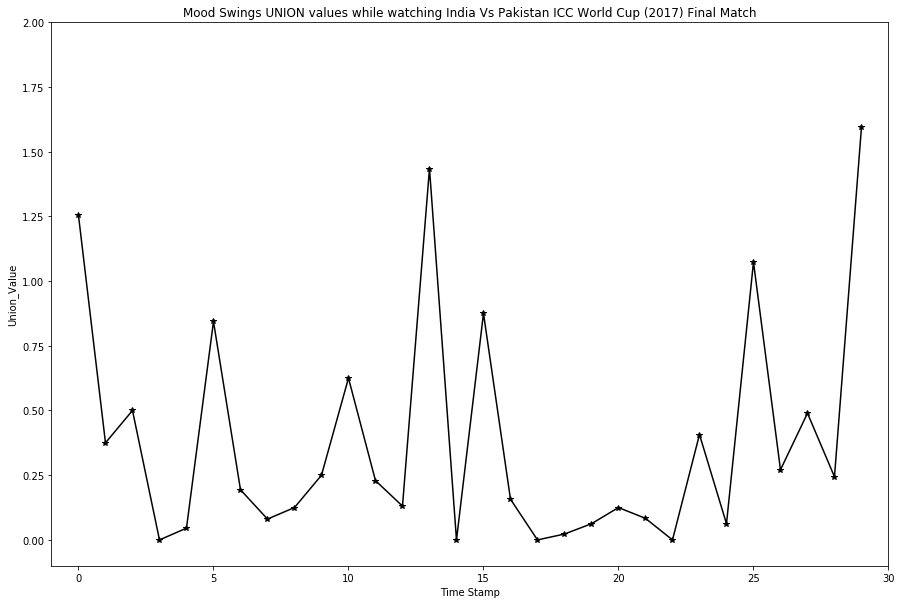

In [7]:
print("Mood Swing UNION Values of Tweets for all timestamps (30) is :")
plt.figure(figsize=(15,10))
print(global_union)
plt.xlim(-1,30)
plt.ylim(-0.1,2)
plt.plot(global_union,'-*',color='k')
plt.title("Mood Swings UNION values while watching India Vs Pakistan ICC World Cup (2017) Final Match")
plt.xlabel("Time Stamp")
plt.ylabel("Union_Value")
plt.show()

Mood Swing Positive Values of Tweets for all timestamps (30) is :
[0.3977, 0.375, 0.5, 0, 0.0, 0.2188, 0.0812, 0.0528, 0.125, 0.0, 0.0, 0.0, 0.087, 0.1392, 0.0, 0.25, 0.0513, 0.0, 0.0, 0.0, 0.125, 0.0, 0.0, 0.1076, 0.0, 0.13570000000000002, 0.27080000000000004, 0.48950000000000005, 0.0163, 0.6054999999999999]


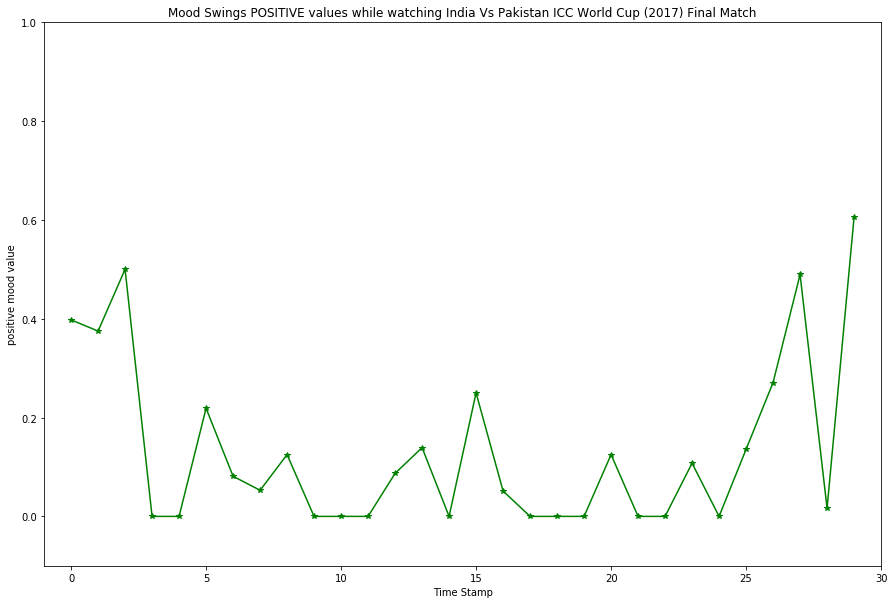

In [8]:
print("Mood Swing Positive Values of Tweets for all timestamps (30) is :")
plt.figure(figsize=(15,10))
print(pos_sum)
plt.xlim(-1,30)
plt.ylim(-0.1,1)
plt.plot(pos_sum,'*-',color='g')
plt.title("Mood Swings POSITIVE values while watching India Vs Pakistan ICC World Cup (2017) Final Match")
plt.xlabel("Time Stamp")
plt.ylabel("positive mood value")
plt.show()

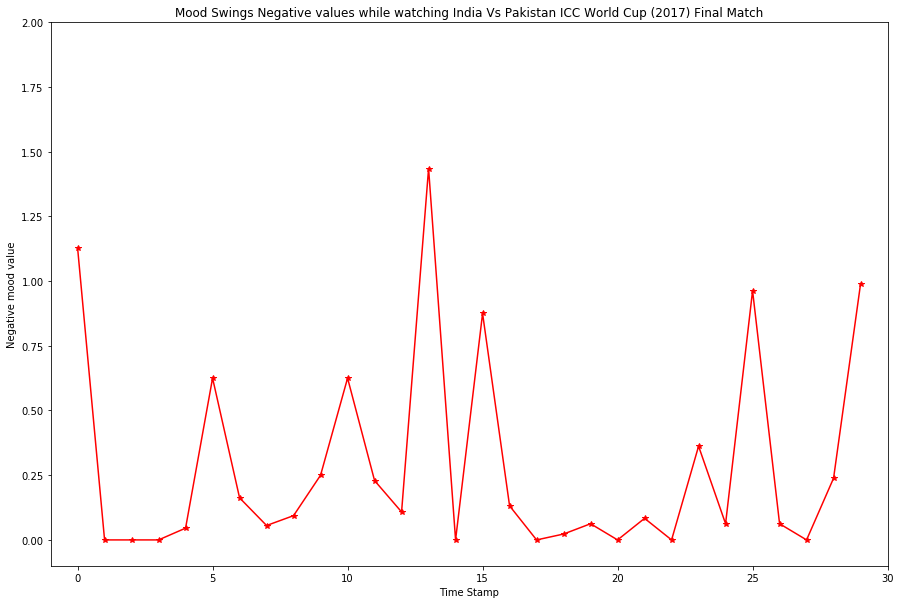

In [9]:
plt.figure(figsize=(15,10))
plt.xlim(-1,30)
plt.ylim(-0.1,2)
plt.plot(neg_sum,'*-',color='r')
plt.title("Mood Swings Negative values while watching India Vs Pakistan ICC World Cup (2017) Final Match")
plt.xlabel("Time Stamp")
plt.ylabel("Negative mood value")
plt.show()

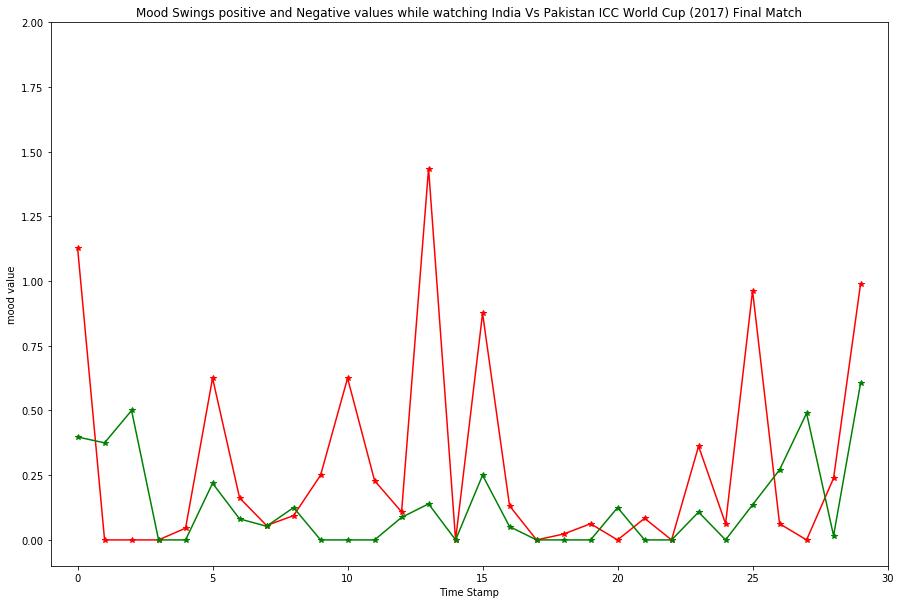

In [10]:
plt.figure(figsize=(15,10))
plt.xlim(-1,30)
plt.ylim(-0.1,2)
plt.plot(neg_sum,'*-',color='r')
plt.plot(pos_sum,'*-',color='g')
plt.title("Mood Swings positive and Negative values while watching India Vs Pakistan ICC World Cup (2017) Final Match")
plt.xlabel("Time Stamp")
plt.ylabel("mood value")
plt.show()